In [1]:
#Importing all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics

from sklearn.utils import resample

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

from xgboost import XGBClassifier

from catboost import CatBoostClassifier

from lightgbm import LGBMClassifier

from sklearn.pipeline import Pipeline

from statsmodels.stats.outliers_influence import variance_inflation_factor #as vif

from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV, LeaveOneOut

from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.decomposition import PCA

import calendar

import time

import pickle

### 1. Import and understand the data. [5 Marks]

#### 1A. Import ‘signal-data.csv’ as DataFrame. [2 Marks]

In [2]:
#Importing the dataframe
sd = pd.read_csv('D:/Great Learning/Study Material/7. Module-6_Featurization, Model Selection & Tuning/Featurization, Model Selection & Tuning - Project/signal-data.csv')
display(sd.head())
sd.info()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


- Here we observe that 1 Column is 'int' type, 1 column is 'object' type & rest all columns are 'float'  type.
- We need to verify 'Time' column & convert it into datetime format.

In [3]:
sd['Time'].dtype

dtype('O')

In [4]:
#Converting 'Time' Feature to datetime format
sd['Time'] = pd.to_datetime(sd['Time'])
sd['Time'].dtype

dtype('<M8[ns]')

#### 1B. Print 5 point summary and share at least 2 observations. [3 Marks]

In [5]:
#Using .describe method to get 5 points summary & other details.
sd.describe(include='all', datetime_is_numeric=True).T.head(50)

,count,mean,min,25%,50%,75%,max,std
Time,1567,2008-07-30 21:44:12.712188928,2008-01-08 02:02:00,2008-07-09 15:32:00,2008-08-23 13:02:00,2008-09-22 11:16:30,2008-12-10 18:47:00,NaN
0,1561.0,3014.452896,2743.24,2966.26,3011.49,3056.65,3356.35,73.621787
1,1560.0,2495.850231,2158.75,2452.2475,2499.405,2538.8225,2846.44,80.407705
2,1553.0,2200.547318,2060.66,2181.0444,2201.0667,2218.0555,2315.2667,29.513152
3,1553.0,1396.376627,0.0,1081.8758,1285.2144,1591.2235,3715.0417,441.69164
4,1553.0,4.197013,0.6815,1.0177,1.3168,1.5257,1114.5366,56.35554
5,1553.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0
6,1553.0,101.112908,82.1311,97.92,101.5122,104.5867,129.2522,6.237214
7,1558.0,0.121822,0.0,0.1211,0.1224,0.1238,0.1286,0.008961
8,1565.0,1.462862,1.191,1.4112,1.4616,1.5169,1.6564,0.073897


##### Observations:
- There seems to be few missing values present the dataset.
- Few columns/features like '5', '13', '42' etc. have same value for each entry. These features shall not be useful in predicting 'Pass/Fail' set of any enrty.
- The data presented is highly unscaled. Hence it is extremely important to scale the data before proceeding.

### 2. Data cleansing: [15 Marks]

#### 2A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. [5 Marks]

In [6]:
#Creating the dataframe with 1 column as null value & another column as percentage of null value
Null = pd.DataFrame({'Null_Val': sd.isnull().sum(), 'Null_Val(%)': round(sd.isnull().sum()/len(sd)*100, 2)})
display(Null)

#Creating a list of Features with Null values > 20% & Then dropping the same columns from the dataframe
NullFeat_20 = []

for col in sd.columns:
    if Null.loc[col, 'Null_Val(%)']>20:
        NullFeat_20.append(col)
print('The Featues with more than 20% Null values are: \n',NullFeat_20, '\n\n')

#Dropping the features from dataset
sdata = sd.drop(NullFeat_20, axis=1)

#Imputing the rest of null values with mean of the feature except 'Time' & 'Pass/Fail' Feature
sdata_temp = sdata.drop(['Time', 'Pass/Fail'], axis=1)
mean_fil = lambda x: x.fillna(x.mean())
sdata_temp = sdata_temp.apply(mean_fil, axis=0)
sdata.update(sdata_temp)

#After dropping feature with more than 20% null values & Imputing the rest of the features with mean, checking for any null
#values
print('Null values present after dropping & Imputing the dataset:', sdata.isnull().sum().sum())

,Null_Val,Null_Val(%)
Time,0,0.00
0,6,0.38
1,7,0.45
2,14,0.89
3,14,0.89
...,...,...
586,1,0.06
587,1,0.06
588,1,0.06
589,1,0.06


The Featues with more than 20% Null values are: 
 ['72', '73', '85', '109', '110', '111', '112', '157', '158', '220', '244', '245', '246', '247', '292', '293', '345', '346', '358', '382', '383', '384', '385', '492', '516', '517', '518', '519', '578', '579', '580', '581'] 


Null values present after dropping & Imputing the dataset: 0


#### 2B. Identify and drop the features which are having same value for all the rows. [3 Marks]

In [7]:
#Identifying all the features with same value in all rows
same_val_col = []
print('Shape of Dataset "before" dropping Features with same value in all the rows:', sdata.shape)
for col in sdata.columns:
    if (sdata[col].mean()==sdata[col].median()) & (sdata[col].median()==sdata[col].mode()[0]):
        same_val_col.append(col)
#print('The Features with same values in all rows are: \n',same_val_col)

#Dropping these features from the dataset
sdata = sdata.drop(same_val_col, axis=1)
print('Shape of Dataset "after" Dropping Featues with same value in all the rows:', sdata.shape, '\n')
print('The total number of Feature having same value in all rows which have been dropped are', len(same_val_col))

Shape of Dataset "before" dropping Features with same value in all the rows: (1567, 560)
Shape of Dataset "after" Dropping Featues with same value in all the rows: (1567, 443) 

The total number of Feature having same value in all rows which have been dropped are 117


#### 2C. Drop other features if required using relevant functional knowledge. Clearly justify the same. [2 Marks]

In [8]:
#Checking the columns/Feature with Standard Deviation less than 1.
sdata_des = sdata.describe(include='all', datetime_is_numeric=True).T
sdata_des[sdata_des['std']<1]

,count,mean,min,25%,50%,75%,max,std
7,1567.0,0.121822,0.0,0.1211,0.1224,0.1238,0.1286,0.008936
8,1567.0,1.462862,1.191,1.41125,1.4616,1.51685,1.6564,0.073849
9,1567.0,-0.000841,-0.0534,-0.0108,-0.0013,0.0084,0.0749,0.015107
10,1567.0,0.000146,-0.0349,-0.0056,0.0004,0.0059,0.053,0.009296
11,1567.0,0.964353,0.6554,0.9581,0.9658,0.9713,0.9848,0.012444
...,...,...,...,...,...,...,...,...
584,1567.0,0.003847,0.0017,0.0031,0.0036,0.0041,0.1045,0.003719
586,1567.0,0.021458,-0.0169,0.01345,0.0205,0.0276,0.1028,0.012354
587,1567.0,0.016475,0.0032,0.0106,0.0148,0.0203,0.0799,0.008805
588,1567.0,0.005283,0.001,0.0033,0.0046,0.0064,0.0286,0.002866


- Here we observe that there are 216 rows with standard deviation less than 1 (excluding the target column - 'Pass/Fail').
- We can further observe from the above dataframe that there are multiple rows with standard deviation less than 0.09.
- Even when we perform Normalization, the standard deviation is set to be around 1.
- These rows are practically not much useful in predicting the data set compared to other rows.
- Hence it is better to drop these rows rather than just increase the correlation & multi-colinearity in the dataset.

In [9]:
#Dropping the rows with less than 1 standard deviation
std_lt1_drop = sdata_des[sdata_des['std']<1].index[:-1]
sdata.drop(std_lt1_drop, axis=1, inplace=True)
sdata.shape

(1567, 227)

- Here we see that the number of data has been reduced from 443 to 227 as we have dropped these rows.
- Now we need to check the correlation of the dataset for all collumns.

In [10]:
#Checking the correlation of all the columns
sdata_corr = sdata.corr().abs()
upper_sdata_corr = sdata_corr.where(np.triu(np.ones(sdata_corr.shape), k=1).astype(bool))
to_drop = [column for column in upper_sdata_corr.columns if any(upper_sdata_corr[column]>.95)]
print(len(to_drop))

68


##### Observations:
- A dataset with no correlation is hardly possible in real indusrtial scenerio.
- Here we observe that there are in total 68 features that have more than 95% correlation.
- Features having this much high correlation may impact the accuracy of the model.
- While it is not possible to remove 100% of correlated Features, we can remove very highly correlated Features.
- Hence here we have selected feature with 95% or more correlation only which is extremly high.
- Therefore, it is better to drop these features from our dataset to avoid the model to get impacted by them.

In [11]:
#Dropping these 68 features from the dataset
sdata.drop(to_drop, axis=1, inplace=True)
sdata.shape

(1567, 159)

#### 2D. Check for multi-collinearity in the data and take necessary action. [3 Marks]

In [12]:
#Checking for Multi-Collinearity
vif = pd.DataFrame()
vif['Features'] = sdata.columns[1:-1]
vif['VIF_Score'] = [variance_inflation_factor(sdata.iloc[:, 1:-1].values,i) for i in range(sdata.iloc[:, 1:-1].shape[1])]
vif

,Features,VIF_Score
0,0,2018.640385
1,1,1130.064137
2,2,7759.539379
3,3,89.179830
4,4,14.130933
...,...,...
152,570,1088.449533
153,572,5.023029
154,577,12.659013
155,585,1.957034


- Ideally, a VIF score greater than 10 is considered as a very high multi-collinearity.
- Here we need to check if we remove all the features with VIF Score > 10, how many Feature needs to be dropped.

In [13]:
print('Features with VIF Score less than 10:', len(vif[vif['VIF_Score']<10]))
print('Features with VIF Score more than 10:', len(vif[vif['VIF_Score']>10]))

Features with VIF Score less than 10: 47
Features with VIF Score more than 10: 110


- Here we see that only 47 Features have VIF Score less than 10.
- So if we are to remove all the other Features, we shall need to drop 110 Features.
- Dropping these many features doesn't seem much feasible at this point, as many valuable information maybe lost.
- Further in the given dataset, we don't know what each Feature represents as the names are not available.
- So we cannot even proceed to merge some feature to reduce the VIF Score. It can only be reduced by droping them. 
- Hence it is not advisible to remove these many Features.
- We see that the VIF scores for many Features is extremely high.
- Hence we may select to remove the Features with VIF Score more than 100 for this dataset.

In [14]:
#Checking for all the features with 'VIF_Score' > 100 & Removing them to see the reduction in Mulit-Collinearity
Feat = list(vif[vif['VIF_Score']>100]['Features'])
len(Feat)

67

In [15]:
#Dropping all the Features with VIF Score more than 100 (i.e. dropping 123 Features)
sdata_final = sdata.drop(Feat, axis=1)

#Re-checking Multi-Colinearity after dropping all these columns
vif_fin = pd.DataFrame()
vif_fin['Fin_Feature'] = sdata_final.columns[1:-1]
vif_fin['Fin_VIF_Score'] = [variance_inflation_factor(sdata_final.iloc[:, 1:-1].values, i) for i in range(sdata_final.iloc[:, 1:-1].shape[1])]
vif_fin

,Fin_Feature,Fin_VIF_Score
0,3,51.087876
1,4,11.912967
2,23,9.520879
3,24,1.137601
4,33,45.472751
...,...,...
85,569,7.286057
86,572,4.619860
87,577,11.721734
88,585,1.801716


In [16]:
sdata_final.shape

(1567, 92)

After dropping the Features with more than 100 VIF Score, the Dataset has now 92 feature present in it on which we may proceed further.

#### 2E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. [2 Marks]

-- Initially, the Time Feature had data type as object. Hence we converted it to date-time data type.

##### Modification made in  2A.
- Here we dropped Features/Columns with more than 20% null values, rather than inputing this null values.
- Instead of changing more than 20% of the Feature values, it is better to drop the values.

##### Modification made in 2B.
- Here we dropped Features that have same values in each rows.
- These type of Features have make no impact on accuracy or prediction of the model & rather have negative impact on models. Hence are useless.
- These type of Features may affect correlation and multi-collinearity & thus are not good for the model.

##### Modification made in 2C.
Standard Deviation:
- Initially we checked for the features with standard deviation less than 1.
- We than proceed to remove these features as they may have no impact in predection of model.

Correlation:
- A correlated Feature is not good for model.
- However we cannot remove correlation totally.
- Here we don't know what the Feture represents exactly as the names are not mentioned.
- Therefore we need to be very careful in removing the Features.
- Hence we only chose to remove 95% or more correlated Features.

##### Modification made in 2D.
- Here we checked the multi-collinearity present in the dataset.
- We found vary high multi-collinearity for many Features.
- Normally the VIF score for Multi-Collinearity shall be less than 10. But here very few Feature have less than 10 IVF Score. So if we proceed to remove all other Features, we may loose much more information.
- Hence we choose to remove only features with more than IVF Score more than 100.

### 3. Data analysis & visualisation: [5 Marks]

#### 3A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. [2 Marks]

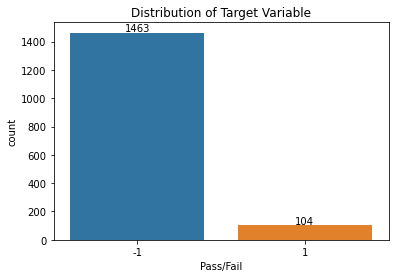

In [17]:
#Analysing the distribution of target variable 'Pass/Fail'
sns.countplot(data=sdata_final, x='Pass/Fail')
for i in range(len(sdata_final['Pass/Fail'].value_counts())):
    plt.text(i, sdata_final['Pass/Fail'].value_counts().values[i]+10, sdata_final['Pass/Fail'].value_counts().values[i], ha='center')
plt.title('Distribution of Target Variable')
plt.show();

- Here we see that the targer variable is highly imblanced.
- The value '1' which represents Failure is very low compared to that of '-1' which represents pass state.
- Hence during model building it is extremly important to sample the target varaible.

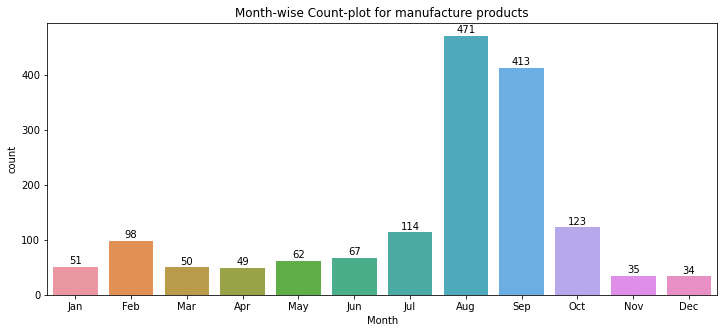

In [18]:
#Analysing the data month-wise from 'Time' column
plt.figure(figsize=(12,5))
sns.countplot(data=sdata_final, x=sdata_final['Time'].dt.month)
plt.xlabel('Month')
plt.xticks(range(12), [calendar.month_abbr[i] for i in sdata_final['Time'].dt.month.value_counts().index.sort_values(ascending=True)])
for i in range(1, len(sdata_final['Time'].dt.month.value_counts())+1):
    plt.text(i-1, sdata_final['Time'].dt.month.value_counts()[i]+5, sdata_final['Time'].dt.month.value_counts()[i], ha='center')
plt.title('Month-wise Count-plot for manufacture products')
plt.show();

- Here we observe that the maximum manufacturing has been achieved in the month of Aug, follwed by Sep.
- The least manufacturing is observed in the month of Dec.
- For most of the months the avg. manufacturing number is around 50, for the 3 months period of 'Feb', 'Jul' & 'Oct' this number rises to 111, while it rises extremly to 442 in 'AUg' & 'Sep'.

#### 3B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. [3 Marks]

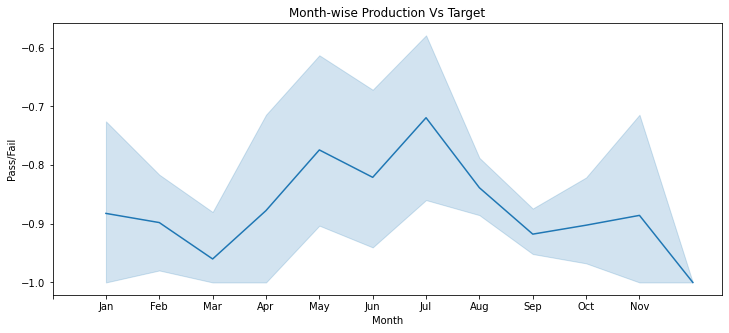

In [19]:
#Bivariate Analysis of 'Time' vs 'Pass/fail'
plt.figure(figsize=(12,5))
sns.lineplot(data=sdata_final, x=sdata_final['Time'].dt.month, y='Pass/Fail')#, marker='o')
plt.xlabel('Month')
plt.xticks(range(12), [calendar.month_abbr[i] for i in range(12)])
plt.title('Month-wise Production Vs Target')
plt.show();

- Here we observe that as most of the target feature is represented by '-1' compared to '1', the mean skewed towards -1.
- This has been observed previously as well because the manufacturing products passed '-1' are very much higher than the products failed '1'.

Performing Multi-Variate Analysis is not possibe here as we are not sure of what each feature represents.

### 4. Data pre-processing: [10 Marks]

#### 4A. Segregate predictors vs target attributes. [2 Marks]

In [20]:
#Seperating Predictors/Independent Feature
x = sdata_final.drop('Pass/Fail', axis=1)
x['Time'] = pd.to_numeric(pd.to_datetime(x['Time']))
#Seperating Target Feature
y = sdata_final['Pass/Fail']

#### 4B. Check for target balancing and fix it if found imbalanced. [3 Marks]

In [21]:
# We have already established that the target variable is highly imbalanced
# Hence we need to balance the target variable
# To balance the Target variable we oversample the minority class

ros = RandomOverSampler(random_state=1)
xros, yros = ros.fit_resample(x, y.ravel())

xros = pd.DataFrame(xros)

In [22]:
xros.shape

(2926, 91)

In [23]:
yros.shape

(2926,)

#### 4C. Perform train-test split and standardise the data or vice versa if required. [3 Marks]

In [24]:
#Splitting the dataset into train-test data
x_tr, x_te, y_tr, y_te = train_test_split(xros, yros, test_size=0.20, random_state=1, stratify=yros)

#Standardizing the independnet Feature - x_tr & x_te
ss = StandardScaler()
x_tr_ss = ss.fit_transform(x_tr)
x_te_ss = ss.fit_transform(x_te)

x_tr_ss = pd.DataFrame(x_tr_ss, columns = x.columns)
x_te_ss = pd.DataFrame(x_te_ss, columns = x.columns)

In [25]:
#Checking the distribution of target classes in training set
utr, ctr = np.unique(y_tr, return_counts=True)
print(np.asarray((utr, ctr)).T)

[[  -1 1170]
 [   1 1170]]


In [26]:
#Checking the distribution of target classes in testing set
ute, cte = np.unique(y_te, return_counts=True)
print(np.asarray((ute, cte)).T)

[[ -1 293]
 [  1 293]]


#### 4D. Check if the train and test data have similar statistical characteristics when compared with original data. [2 Marks]

In [27]:
#Checking the ratio of Target Feature class
#Checking the ratio of Target Feature class in original dataset
print('Ratio of Target Feature class in Original Dataset: \n', sdata_final['Pass/Fail'].value_counts(normalize=True), '\n')

#Checking the ratio of Target Feature class in train dataset after oversampling
print('Ratio of Target Feature class in Training  Dataset after Oversampling:')
utr, ctr = np.unique(y_tr, return_counts=True)
print(np.asarray((utr, ctr/len(y_tr))).T, '\n')

#checking the ratio of Target Feature class in test dataset after oversampling
print('Ratio of Target Feature class in Testing Dataset after Oversampling:')
ute, cte = np.unique(y_te, return_counts=True)
print(np.asarray((ute, cte/len(y_te))).T)

Ratio of Target Feature class in Original Dataset: 
 -1    0.933631
 1    0.066369
Name: Pass/Fail, dtype: float64 

Ratio of Target Feature class in Training  Dataset after Oversampling:
[[-1.   0.5]
 [ 1.   0.5]] 

Ratio of Target Feature class in Testing Dataset after Oversampling:
[[-1.   0.5]
 [ 1.   0.5]]


In [28]:
#Checking the statistical characteristic of DataSet
#Original Dataset
print('Statistical Characteristic of Original Dataset (excluding the Target Feature):')
display(x.describe())
print('\n')

#Training Dataset Before Standardizing
print('Statisctical Characteristic of Training Dataset before Standardizing (excluding the Target Feature):')
display(x_tr.describe())
print('\n')

#Testing Dataset Before Standardizing
print('Statisctical Characteristic of Testing Dataset before Standardizing (excluding the Target Feature):')
display(x_te.describe())
print('\n')

#Training Dataset After Standardizing
print('Statisctical Characteristic of Training Dataset after Standardizing (excluding the Target Feature):')
display(x_tr_ss.describe())
print('\n')

#Testing Dataset After Standardizing
print('Statisctical Characteristic of Testing Dataset after Standardizing (excluding the Target Feature):')
display(x_te_ss.describe())

Statistical Characteristic of Original Dataset (excluding the Target Feature):


,Time,3,4,23,24,33,40,41,51,59,...,550,551,555,561,564,569,572,577,585,589
count,1.567000e+03,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,1.217454e+18,1396.376627,4.197013,-3806.299734,-298.598136,8.960279,67.904909,3.353066,157.420991,2.960241,...,17.013313,1.230712,57.746537,32.284956,6.444985,21.117674,28.450165,16.642363,3.067826,99.670066
std,7.023985e+15,439.712852,56.103066,1379.280537,2900.835956,1.344027,23.877841,2.342268,60.905653,9.510891,...,4.535925,1.243000,32.152263,19.020006,2.393043,9.280454,86.304681,12.485267,3.576891,93.861936
min,1.199758e+18,0.000000,0.681500,-9986.750000,-14804.500000,7.603200,1.434000,-0.075900,40.261400,-28.988200,...,6.110000,0.120000,4.826900,7.236900,0.970000,3.250400,3.540000,4.582000,1.197500,0.000000
25%,1.215618e+18,1083.885800,1.017700,-4370.625000,-1474.375000,8.580000,74.240000,2.699000,115.537450,-1.855450,...,14.820000,0.910000,34.147100,15.766900,4.980000,15.466200,7.500000,11.501550,2.306500,44.368600
50%,1.219497e+18,1287.353800,1.317100,-3819.750000,-80.500000,8.770000,78.270000,3.080000,183.284200,0.973600,...,17.013313,1.230712,57.746537,29.780100,6.290000,20.182400,8.650000,13.817900,2.757700,72.023000
75%,1.222082e+18,1590.169900,1.529600,-3356.375000,1376.250000,9.060600,80.180000,3.515000,206.976700,4.337700,...,18.405000,1.330000,69.630650,44.113400,7.310000,23.035200,10.130000,17.080900,3.294950,114.749700
max,1.228935e+18,3715.041700,1114.536600,2363.000000,14106.000000,23.345300,86.120000,37.880000,258.543200,168.145500,...,131.680000,39.330000,303.550000,101.114600,32.580000,84.802400,454.560000,96.960100,99.303200,737.304800




Statisctical Characteristic of Training Dataset before Standardizing (excluding the Target Feature):


,Time,3,4,23,24,33,40,41,51,59,...,550,551,555,561,564,569,572,577,585,589
count,2.340000e+03,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,...,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000
mean,1.217150e+18,1368.745619,2.748669,-3777.045981,-394.212752,9.146789,65.178010,3.375547,158.138166,5.607628,...,17.551326,1.393261,58.814662,33.785253,6.519140,21.890089,22.882417,15.532050,3.097789,100.111055
std,6.623119e+15,392.778225,39.790691,1407.803492,2668.587481,1.936190,25.650102,1.765434,62.106974,10.551114,...,6.889095,2.186651,33.779878,20.273109,2.457886,10.215790,72.235866,10.254021,3.041876,86.489219
min,1.199758e+18,0.000000,0.681500,-9986.750000,-14804.500000,7.603200,1.434000,-0.075900,40.261400,-28.988200,...,6.210000,0.160000,4.826900,7.236900,0.970000,3.250400,3.540000,4.582000,1.197500,0.000000
25%,1.215517e+18,1070.043900,1.030400,-4373.750000,-1490.812500,8.621100,65.550000,2.666000,113.452300,-0.821800,...,14.612500,0.917500,36.587275,16.721100,4.980000,15.466200,7.470000,11.089225,2.302000,45.426400
50%,1.219202e+18,1269.607800,1.309250,-3806.299734,-50.625000,8.804300,77.830000,3.093000,185.757400,2.520900,...,17.013313,1.230712,57.746537,30.148700,6.444985,21.117674,8.700000,13.705000,2.751150,74.058900
75%,1.221790e+18,1572.469800,1.510200,-3273.750000,1334.750000,9.163800,79.800000,3.773000,207.369600,10.112725,...,18.862500,1.340000,69.964750,47.296400,7.492500,23.930800,10.195000,16.411100,3.325800,118.771050
max,1.228935e+18,3715.041700,1114.536600,2363.000000,14106.000000,23.345300,85.400000,37.880000,258.543200,168.145500,...,131.680000,39.330000,303.550000,99.037500,32.580000,83.409300,452.540000,96.960100,99.303200,737.304800




Statisctical Characteristic of Testing Dataset before Standardizing (excluding the Target Feature):


,Time,3,4,23,24,33,40,41,51,59,...,550,551,555,561,564,569,572,577,585,589
count,5.860000e+02,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,...,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,1.217551e+18,1371.501863,3.228486,-3787.091694,-480.600614,9.059733,67.220639,3.389252,156.764781,4.446864,...,17.358284,1.280792,59.073515,32.370003,6.581379,21.498751,25.037456,15.589691,3.058816,105.475923
std,6.593450e+15,401.041461,45.889861,1421.155295,2580.221558,1.526890,24.106251,2.270125,61.885003,9.571787,...,6.057670,1.781291,28.137236,18.993536,2.268129,9.205903,76.338125,9.812999,1.202196,93.657141
min,1.199772e+18,847.797600,0.681500,-8812.250000,-10366.333000,8.116100,2.126000,0.544100,40.261400,-21.205500,...,6.110000,0.120000,5.385900,7.236900,1.100000,3.290800,4.940000,5.728100,1.471600,0.000000
25%,1.216508e+18,1084.722100,1.020400,-4438.250000,-1468.312500,8.607400,67.904909,2.634250,113.056500,-1.047750,...,14.530000,0.890000,37.714300,16.089100,4.980000,15.466200,7.280000,11.256275,2.303200,45.426400
50%,1.219336e+18,1281.786200,1.304800,-3826.125000,-189.375000,8.810500,78.150000,3.093000,180.166350,1.967750,...,17.013313,1.230712,57.746537,29.917350,6.444985,21.117674,8.675000,13.586000,2.798250,78.119900
75%,1.221887e+18,1562.549975,1.529600,-3309.333300,759.000000,9.158500,79.860000,3.673000,206.719525,8.415650,...,18.557500,1.330000,74.591200,44.874500,7.485000,24.055350,10.165000,16.679450,3.436750,128.281900
max,1.228879e+18,3619.739700,1112.160000,1614.750000,10126.666700,23.345300,86.120000,37.880000,248.948600,87.039100,...,90.700000,25.470000,213.696600,101.114600,15.040000,84.802400,454.560000,96.960100,9.167700,579.181700




Statisctical Characteristic of Training Dataset after Standardizing (excluding the Target Feature):


,Time,3,4,23,24,33,40,41,51,59,...,550,551,555,561,564,569,572,577,585,589
count,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,...,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03
mean,-1.090796e-14,1.800554e-16,-6.345530e-17,-6.725389e-17,-3.373370e-17,-5.069070e-16,-3.263534e-16,3.053113e-17,-2.149278e-16,-1.247815e-17,...,-5.920122e-16,5.423012e-17,-3.534803e-16,1.626904e-16,1.466538e-16,-4.451123e-17,-8.421564e-18,1.143909e-16,4.939069e-17,-6.500024e-18
std,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,...,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00
min,-2.626517e+00,-3.485525e+00,-5.196216e-02,-4.411860e+00,-5.401122e+00,-7.974005e-01,-2.485668e+00,-1.955431e+00,-1.898369e+00,-3.279580e+00,...,-1.646624e+00,-5.641160e-01,-1.598564e+00,-1.309815e+00,-2.258170e+00,-1.824986e+00,-2.678247e-01,-1.068107e+00,-6.248431e-01,-1.157745e+00
25%,-2.465438e-01,-7.606470e-01,-4.319191e-02,-4.239452e-01,-4.110167e-01,-2.715649e-01,1.450556e-02,-4.019969e-01,-7.196522e-01,-6.094904e-01,...,-4.266821e-01,-2.176218e-01,-6.581474e-01,-8.418936e-01,-6.263386e-01,-6.289541e-01,-2.134080e-01,-4.333690e-01,-2.616672e-01,-6.324065e-01
50%,3.099172e-01,-2.524555e-01,-3.618249e-02,-2.078415e-02,1.287802e-01,-1.769259e-01,4.933584e-01,-1.600784e-01,4.447993e-01,-2.926125e-01,...,-7.811299e-02,-7.435314e-02,-3.162692e-02,-1.794165e-01,-3.017689e-02,-7.562611e-02,-1.963768e-01,-1.782170e-01,-1.139800e-01,-3.012829e-01
75%,7.007841e-01,5.187857e-01,-3.113123e-02,3.575808e-01,6.480328e-01,8.787707e-03,5.701777e-01,2.251783e-01,7.928571e-01,4.270696e-01,...,1.903667e-01,-2.436262e-02,3.301513e-01,6.665990e-01,3.960997e-01,1.998031e-01,-1.756763e-01,8.574562e-02,7.497338e-02,2.157955e-01
max,1.779765e+00,5.974867e+00,2.794688e+01,4.362369e+00,5.434827e+00,7.334789e+00,7.885470e-01,1.954863e+01,1.616992e+00,1.540810e+01,...,1.657011e+01,1.735295e+01,7.246552e+00,3.219348e+00,1.060522e+01,6.023260e+00,5.949253e+00,7.942782e+00,3.163376e+01,7.368895e+00




Statisctical Characteristic of Testing Dataset after Standardizing (excluding the Target Feature):


,Time,3,4,23,24,33,40,41,51,59,...,550,551,555,561,564,569,572,577,585,589
count,5.860000e+02,5.860000e+02,5.860000e+02,5.860000e+02,5.860000e+02,5.860000e+02,5.860000e+02,5.860000e+02,5.860000e+02,5.860000e+02,...,5.860000e+02,5.860000e+02,5.860000e+02,5.860000e+02,5.860000e+02,5.860000e+02,5.860000e+02,5.860000e+02,5.860000e+02,5.860000e+02
mean,-1.683655e-14,1.500506e-16,-1.353440e-17,6.152644e-17,-2.245076e-17,-3.751266e-17,3.376139e-16,5.162727e-17,1.060964e-17,-3.613909e-17,...,-8.601387e-17,-1.202465e-16,-2.978277e-16,5.418495e-17,-3.997561e-17,-1.940048e-16,3.130791e-17,-1.278841e-17,3.992824e-17,6.081597e-17
std,1.000854e+00,1.000854e+00,1.000854e+00,1.000854e+00,1.000854e+00,1.000854e+00,1.000854e+00,1.000854e+00,1.000854e+00,1.000854e+00,...,1.000854e+00,1.000854e+00,1.000854e+00,1.000854e+00,1.000854e+00,1.000854e+00,1.000854e+00,1.000854e+00,1.000854e+00,1.000854e+00
min,-2.698870e+00,-1.306976e+00,-5.554956e-02,-3.538988e+00,-3.834623e+00,-6.185382e-01,-2.702629e+00,-1.254373e+00,-1.884187e+00,-2.682287e+00,...,-1.858453e+00,-6.522143e-01,-1.909693e+00,-1.324376e+00,-2.418761e+00,-1.979546e+00,-2.634939e-01,-1.005810e+00,-1.321392e+00,-1.127154e+00
25%,-1.583646e-01,-7.156985e-01,-4.815818e-02,-4.585809e-01,-3.831282e-01,-2.964981e-01,2.840984e-02,-3.328658e-01,-7.068857e-01,-5.745331e-01,...,-4.672920e-01,-2.195743e-01,-7.597570e-01,-8.579136e-01,-7.066384e-01,-6.558514e-01,-2.328146e-01,-4.419769e-01,-6.290666e-01,-6.417111e-01
50%,2.709321e-01,-2.238978e-01,-4.195544e-02,-2.748936e-02,1.129649e-01,-1.633690e-01,4.537702e-01,-1.306118e-01,3.784691e-01,-2.592235e-01,...,-5.699650e-02,-2.813861e-02,-4.720119e-02,-1.292413e-01,-6.018659e-02,-4.143017e-02,-2.145250e-01,-2.043619e-01,-2.169266e-01,-2.923364e-01
75%,6.581283e-01,4.767869e-01,-3.705257e-02,3.364633e-01,4.808345e-01,6.474006e-02,5.247668e-01,1.250991e-01,8.079085e-01,4.149880e-01,...,1.981356e-01,2.764862e-02,5.519712e-01,6.589178e-01,3.987396e-01,2.779503e-01,-1.949899e-01,1.111474e-01,3.146385e-01,2.437130e-01
max,1.719546e+00,5.610788e+00,2.418571e+01,3.804269e+00,4.114503e+00,9.363984e+00,7.846723e-01,1.520631e+01,1.490871e+00,8.636088e+00,...,1.211759e+01,1.359120e+01,5.500014e+00,3.622460e+00,3.732524e+00,6.882294e+00,5.631387e+00,8.299188e+00,5.085779e+00,5.062193e+00


- Here we observe that initially in the original dataset (after cleaning), the ratio of Target Class Pass was 93.36% while that of Fail Class was 6.64%.
- Then after Oversampling of the dataset & then splitting it into train and test set with stratification of y, we have the ratio of Pass class & Fail class as 50% each in train & test data set.
- Moreover the Original Dataset contained a total of 1567 of data point which were bifurcated as 1463 as '-1 - Pass' and 104 as '1 - Fail'.
- After Oversampling the total Data point have been increased to 2926 which are then bifurcated to 1463 as '-1 - Pass' as well as '1 - Fail' i.e. the points are distributed 50-50 for both the class.
- Further when we splitted the dataset into training & test data, we strartified y, hence the distribution of each class is maintained same in training & test set.
- We here initially split the dataset into train & test set & then we performed Standardization on both the sets. By doing this we have not let the train data get affected from test set.

### 5. Model training, testing and tuning: [20 Marks]

#### 5A. Use any Supervised Learning technique to train a model. [2 Marks]

In [29]:
# As the Target is Classification Feature, We proceed to train a Logistic Regression Model.
#Training the Logistic Regression Model with Training Dataset
logi = LogisticRegression()
logi_fit = logi.fit(x_tr_ss, y_tr)
logi_fit

LogisticRegression()

The Score/Accuracy of the Logistic Regression Model on Test Data is: 0.7218430034129693 

The Confusion Matrix of the Logistic Regression Model


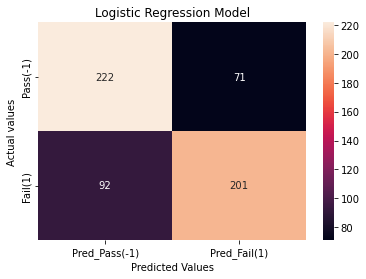

The Classification Report for Logistic Regression Model 
               precision    recall  f1-score   support

          -1       0.71      0.76      0.73       293
           1       0.74      0.69      0.71       293

    accuracy                           0.72       586
   macro avg       0.72      0.72      0.72       586
weighted avg       0.72      0.72      0.72       586



In [30]:
#Predicting the values for test Set on the trained Model
logi_pred = logi.predict(x_te_ss)

#Scoring the Model on Test Set
logi_score = logi.score(x_te_ss, y_te)
print('The Score/Accuracy of the Logistic Regression Model on Test Data is:', logi_score, '\n')

#Generating the Confuision Matrix
print('The Confusion Matrix of the Logistic Regression Model')
logi_conmat = metrics.confusion_matrix(y_te, logi_pred, labels=[-1,1])
sns.heatmap(logi_conmat, fmt='g', annot=True, yticklabels=['Pass(-1)', 'Fail(1)'], xticklabels=['Pred_Pass(-1)', 'Pred_Fail(1)'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.title('Logistic Regression Model')
plt.show();

#Generating the Classification Report
logi_cr = metrics.classification_report(y_te, logi_pred)
print('The Classification Report for Logistic Regression Model \n', logi_cr)

#### 5B. Use cross validation techniques. [3 Marks]

In [31]:
#Scaling the upsampled data before using CV
xros_ss = ss.fit_transform(xros)
xros_ss = pd.DataFrame(xros_ss, columns=x.columns)

###### Using different Cross-Validation Techniques on Logistic Regression Model with Up-Sampled Dataset & checking the accuracy of the each Cross-Validation Techniques

In [32]:
#Using KFold Cross Validation on upsampled dataset & Logistic Regression Model
kfold = KFold(n_splits=10)
kf_result = cross_val_score(logi, xros_ss, yros, cv=kfold)
print('Accuracy of Logistic Regression Model on Up-Sampled dataset using KFoldCV:', kf_result.mean())

Accuracy of Logistic Regression Model on Up-Sampled dataset using KFoldCV: 0.6272757024638833


In [33]:
#Using LeaveOneOUt Cross Validation on upsampled dataset & Logistic Regression Model
loo = LeaveOneOut()
loo_result = cross_val_score(logi, xros_ss, yros, cv=loo)
print('Accuracy of Logistic Regression Model on Up-Sampled dataset using LeaveOneOut CV:', loo_result.mean())

Accuracy of Logistic Regression Model on Up-Sampled dataset using LeaveOneOut CV: 0.7566643882433356


In [34]:
#Using StratifiedKFold
skfold = StratifiedKFold(n_splits=10)
skf_results = cross_val_score(logi, xros_ss, yros, cv=skfold)
print('Accuracy of Logistic Regression Model on Up-Sampled dataset using StratifiedKFold CV:', skf_results.mean())

Accuracy of Logistic Regression Model on Up-Sampled dataset using StratifiedKFold CV: 0.7106000748048062


#### 5C. Apply hyper-parameter tuning techniques to get the best accuracy. [3 Marks]

In [35]:
#Using GridSearchCV to tune the Hyper-Parameter of Logistic Regression Model
logi_para = {'solver': ['liblinear', 'lfbgs', 'sag', 'saga'], 'penalty':['elasticnet', 'l1', 'l2', 'none'],
             'multi_class': ['auto', 'ovr', 'multinomial'], 'C':[0.1, 1, 10],
             'tol': [0.00001, 0.0001, 0.001], 'class_weight': ['balanced', None]}
logi_grid = GridSearchCV(logi, param_grid=logi_para, cv=10)

In [36]:
#Fitting the Model with Training Dataset
logi_grid.fit(x_tr_ss, y_tr)

C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced', None],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['elasticnet', 'l1', 'l2', 'none'],
                         'solver': ['liblinear', 'lfbgs', 'sag', 'saga'],
                         'tol': [1e-05, 0.0001, 0.001]})

In [37]:
#Getting the Best Parameters of the Model
logi_grid.best_params_

{'C': 10,
 'class_weight': None,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.001}

In [38]:
#Getting the Best Score of the Model
logi_grid.best_score_

0.7542735042735043

The Score/Accuracy of the Logistic Regression Model on Test Data is with Hyper-Parameter Tuning (GSCV) is: 0.7252559726962458 

The Confusion Matrix of the Logistic Regression Model with tune Hyper-Parameters (GSCV)


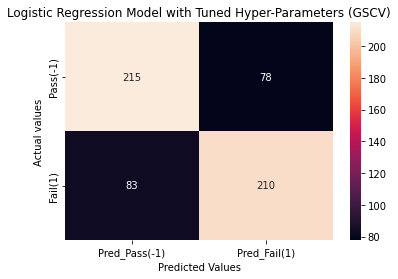

The Classification Report for Logistic Regression Model with tuned Hyper-Parameter (GSCV) 
               precision    recall  f1-score   support

          -1       0.72      0.73      0.73       293
           1       0.73      0.72      0.72       293

    accuracy                           0.73       586
   macro avg       0.73      0.73      0.73       586
weighted avg       0.73      0.73      0.73       586



In [39]:
#Running the model of Test Dataset
#Predicting the values for Test Set on the trained Model
logi_grid_pred = logi_grid.predict(x_te_ss)

#Scoring the Model on Test Set
logi_grid_score = logi_grid.score(x_te_ss, y_te)
print('The Score/Accuracy of the Logistic Regression Model on Test Data is with Hyper-Parameter Tuning (GSCV) is:', logi_grid_score, '\n')

#Generating the Confuision Matrix
print('The Confusion Matrix of the Logistic Regression Model with tune Hyper-Parameters (GSCV)')
logi_grid_conmat = metrics.confusion_matrix(y_te, logi_grid_pred, labels=[-1,1])
sns.heatmap(logi_grid_conmat, fmt='g', annot=True, yticklabels=['Pass(-1)', 'Fail(1)'], xticklabels=['Pred_Pass(-1)', 'Pred_Fail(1)'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.title('Logistic Regression Model with Tuned Hyper-Parameters (GSCV)')
plt.show();

#Generating the Classification Report
logi_grid_cr = metrics.classification_report(y_te, logi_grid_pred)
print('The Classification Report for Logistic Regression Model with tuned Hyper-Parameter (GSCV) \n', logi_grid_cr)

In [40]:
#Using RandomizedSearchCV to tune the Hper-Parameters of Logistic Regression Model
logi_random = RandomizedSearchCV(logi, param_distributions=logi_para, cv=10)

In [41]:
#Fitting the Model with Trainig Dataset
logi_random.fit(x_tr_ss, y_tr)

C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 1, 10],
                                        'class_weight': ['balanced', None],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['elasticnet', 'l1', 'l2',
                                                    'none'],
                                        'solver': ['liblinear', 'lfbgs', 'sag',
                                                   'saga'],
                                        'tol': [1e-05, 0.0001, 0.001]})

In [42]:
#Getting the best parameters
logi_random.best_params_

{'tol': 1e-05,
 'solver': 'liblinear',
 'penalty': 'l2',
 'multi_class': 'ovr',
 'class_weight': None,
 'C': 1}

In [43]:
#Getting the best Score
logi_random.best_score_

0.7508547008547009

The Score/Accuracy of the Logistic Regression Model on Test Data is with Hyper-Parameter Tuning (RSCV) is: 0.7218430034129693 

The Confusion Matrix of the Logistic Regression Model with tune Hyper-Parameters (RSCV)


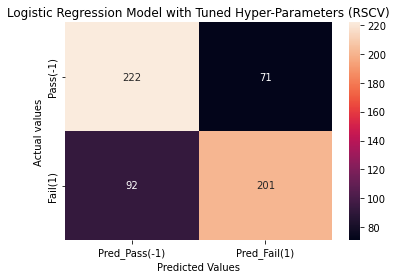

The Classification Report for Logistic Regression Model with Hyper-Parameter Tuning (RSCV) 
               precision    recall  f1-score   support

          -1       0.71      0.76      0.73       293
           1       0.74      0.69      0.71       293

    accuracy                           0.72       586
   macro avg       0.72      0.72      0.72       586
weighted avg       0.72      0.72      0.72       586



In [44]:
#Running the model of Test Dataset
#Predicting the values for Test Set on the trained Model
logi_random_pred = logi_random.predict(x_te_ss)

#Scoring the Model on Test Set
logi_random_score = logi_random.score(x_te_ss, y_te)
print('The Score/Accuracy of the Logistic Regression Model on Test Data is with Hyper-Parameter Tuning (RSCV) is:', logi_random_score, '\n')

#Generating the Confuision Matrix
print('The Confusion Matrix of the Logistic Regression Model with tune Hyper-Parameters (RSCV)')
logi_random_conmat = metrics.confusion_matrix(y_te, logi_random_pred, labels=[-1,1])
sns.heatmap(logi_random_conmat, fmt='g', annot=True, yticklabels=['Pass(-1)', 'Fail(1)'], xticklabels=['Pred_Pass(-1)', 'Pred_Fail(1)'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.title('Logistic Regression Model with Tuned Hyper-Parameters (RSCV)')
plt.show();

#Generating the Classification Report
logi_random_cr = metrics.classification_report(y_te, logi_random_pred)
print('The Classification Report for Logistic Regression Model with Hyper-Parameter Tuning (RSCV) \n', logi_random_cr)

- Here we observed the accuracies as follows:
    - Basic Logistic Regression Model (Logi): 72.18%
    - Hyper-Parameter Tune with GridSearchCV (GSCV): 72.52%
    - Hyper-Parameter Tune with RandomizedSearchCV (RSCV): 72.18%
- We can see that the basic model & RandomizedSearchCV has hit the same result.
- But a very slight improvement can be seen in GSCV model.
- The Recall for 1-Fail has also increased in the GSCV model which better predicts the failed products which is much useful to us rather than just imporving the accuracy of model.

#### 5D. Use any other technique/method which can enhance the model performance. [4 Marks]

In [45]:
#We have already Removed various attribute, Standardization/Normalisation, target balancing previously.

#We have not done Dimensionality Reduction, hence we try the model with Dimensionality Reduction
xros_pca = PCA(n_components=len(xros_ss.columns))
xros_pca.fit(xros_ss)

PCA(n_components=91)

In [46]:
#Checking number of components required for minimum 90% of explianed variance
for var in range(1, len(xros_pca.explained_variance_ratio_)):
    if np.cumsum(xros_pca.explained_variance_ratio_)[var]<0.90:
        var+=1
    else:
        thresh = var+1
        break;
print('Precise Variance Covered by Minimum Required Components (i.e. {}) for 90% or above: {}'.format(thresh, np.cumsum(xros_pca.explained_variance_ratio_)[thresh-1]), '\n')

Precise Variance Covered by Minimum Required Components (i.e. 62) for 90% or above: 0.9025870298352955 



In [47]:
#Applying PCA with 62 components
xros_pca_r = PCA(n_components=62)
xros_pca62 = pd.DataFrame(xros_pca_r.fit_transform(xros_ss))

In [48]:
#Splitting the dataframe into train & test set after performing PCA
xpca_tr, xpca_te, ypca_tr, ypca_te = train_test_split(xros_pca62, yros, test_size=0.2, stratify=yros, random_state=1)

The Score/Accuracy of the Logistic Regression Model on Test Data after performing PCA is: 0.7610921501706485 

The Confusion Matrix of the Logistic Regression Model after performing PCA


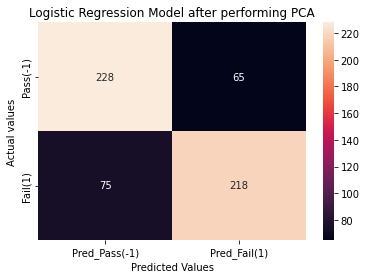

The Classification Report for Logistic Regression Model after performing PCA
               precision    recall  f1-score   support

          -1       0.75      0.78      0.77       293
           1       0.77      0.74      0.76       293

    accuracy                           0.76       586
   macro avg       0.76      0.76      0.76       586
weighted avg       0.76      0.76      0.76       586



In [49]:
#Fitting this dataframe on Logistic Regression 
pca_logi = LogisticRegression()
pca_logi.fit(xpca_tr, ypca_tr)

#Predicting the values for test Set on the trained Model
pca_logi_pred = pca_logi.predict(xpca_te)

#Scoring the Model on Test Set
pca_logi_score = pca_logi.score(xpca_te, ypca_te)
print('The Score/Accuracy of the Logistic Regression Model on Test Data after performing PCA is:', pca_logi_score, '\n')

#Generating the Confuision Matrix
print('The Confusion Matrix of the Logistic Regression Model after performing PCA')
pca_logi_conmat = metrics.confusion_matrix(ypca_te, pca_logi_pred, labels=[-1,1])
sns.heatmap(pca_logi_conmat, fmt='g', annot=True, yticklabels=['Pass(-1)', 'Fail(1)'], xticklabels=['Pred_Pass(-1)', 'Pred_Fail(1)'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.title('Logistic Regression Model after performing PCA')
plt.show();

#Generating the Classification Report
pca_logi_cr = metrics.classification_report(ypca_te, pca_logi_pred)
print('The Classification Report for Logistic Regression Model after performing PCA\n', pca_logi_cr)

In [50]:
#Using the same above paramenter of Logistic Regression used in GSCV, we perform GSCV after PCA
pca_logi_grid = GridSearchCV(pca_logi, param_grid=logi_para, cv=10)

#Fitting the Model
pca_logi_grid.fit(xpca_tr, ypca_tr)

C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced', None],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['elasticnet', 'l1', 'l2', 'none'],
                         'solver': ['liblinear', 'lfbgs', 'sag', 'saga'],
                         'tol': [1e-05, 0.0001, 0.001]})

In [51]:
#Getting the best Parameters
pca_logi_grid.best_params_

{'C': 1,
 'class_weight': None,
 'multi_class': 'auto',
 'penalty': 'none',
 'solver': 'sag',
 'tol': 1e-05}

In [52]:
#Getting the best score
pca_logi_grid.best_score_

0.7397435897435898

The Score/Accuracy of the Logistic Regression Model on Test Data is after performing PCA with Hyper-Parameter Tuning (GSCV) is: 0.7559726962457338 

The Confusion Matrix of the Logistic Regression Model after performing PCA with tune Hyper-Parameters (GSCV)


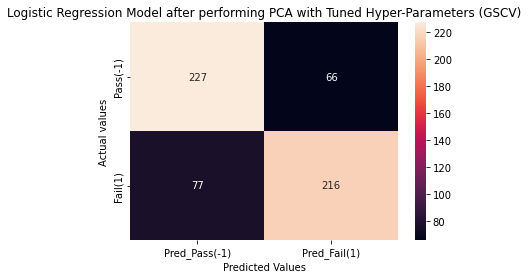

The Classification Report for Logistic Regression Model after performing PCA with tuned Hyper-Parameter (GSCV) 
               precision    recall  f1-score   support

          -1       0.75      0.77      0.76       293
           1       0.77      0.74      0.75       293

    accuracy                           0.76       586
   macro avg       0.76      0.76      0.76       586
weighted avg       0.76      0.76      0.76       586



In [53]:
#Running the model of Test Dataset
#Predicting the values for Test Set on the trained Model
pca_logi_grid_pred = pca_logi_grid.predict(xpca_te)

#Scoring the Model on Test Set
pca_logi_grid_score = pca_logi_grid.score(xpca_te, ypca_te)
print('The Score/Accuracy of the Logistic Regression Model on Test Data is after performing PCA with Hyper-Parameter Tuning (GSCV) is:', pca_logi_grid_score, '\n')

#Generating the Confuision Matrix
print('The Confusion Matrix of the Logistic Regression Model after performing PCA with tune Hyper-Parameters (GSCV)')
pca_logi_grid_conmat = metrics.confusion_matrix(ypca_te, pca_logi_grid_pred, labels=[-1,1])
sns.heatmap(pca_logi_grid_conmat, fmt='g', annot=True, yticklabels=['Pass(-1)', 'Fail(1)'], xticklabels=['Pred_Pass(-1)', 'Pred_Fail(1)'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.title('Logistic Regression Model after performing PCA with Tuned Hyper-Parameters (GSCV)')
plt.show();

#Generating the Classification Report
pca_logi_grid_cr = metrics.classification_report(ypca_te, pca_logi_grid_pred)
print('The Classification Report for Logistic Regression Model after performing PCA with tuned Hyper-Parameter (GSCV) \n', pca_logi_grid_cr)

In [54]:
#Using the same above paramenter of Logistic Regression used in RSCV, we perform RSCV after PCA
pca_logi_random = RandomizedSearchCV(pca_logi, param_distributions=logi_para, cv=10)

#Fitting the Model
pca_logi_random_fit = pca_logi_random.fit(xpca_tr, ypca_tr)
pca_logi_random_fit

C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 1, 10],
                                        'class_weight': ['balanced', None],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['elasticnet', 'l1', 'l2',
                                                    'none'],
                                        'solver': ['liblinear', 'lfbgs', 'sag',
                                                   'saga'],
                                        'tol': [1e-05, 0.0001, 0.001]})

In [55]:
#Getting the best parameters =
pca_logi_random.best_params_

{'tol': 0.001,
 'solver': 'sag',
 'penalty': 'l2',
 'multi_class': 'ovr',
 'class_weight': None,
 'C': 10}

In [56]:
#Getting the best Score
pca_logi_random.best_score_

0.7393162393162394

The Score/Accuracy of the Logistic Regression Model on Test Data after performing PCA is with Hyper-Parameter Tuning (RSCV) is: 0.7559726962457338 

The Confusion Matrix of the Logistic Regression Model after performing PCA with tune Hyper-Parameters (RSCV)


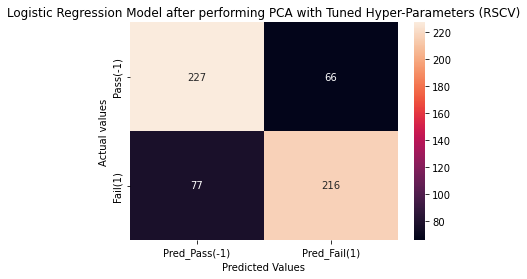

The Classification Report for Logistic Regression Model after performing PCA with Hyper-Parameter Tuning (RSCV) 
               precision    recall  f1-score   support

          -1       0.75      0.77      0.76       293
           1       0.77      0.74      0.75       293

    accuracy                           0.76       586
   macro avg       0.76      0.76      0.76       586
weighted avg       0.76      0.76      0.76       586



In [57]:
#Running the model of Test Dataset
#Predicting the values for Test Set on the trained Model
pca_logi_random_pred = pca_logi_random.predict(xpca_te)

#Scoring the Model on Test Set
pca_logi_random_score = pca_logi_random.score(xpca_te, ypca_te)
print('The Score/Accuracy of the Logistic Regression Model on Test Data after performing PCA is with Hyper-Parameter Tuning (RSCV) is:', pca_logi_random_score, '\n')

#Generating the Confuision Matrix
print('The Confusion Matrix of the Logistic Regression Model after performing PCA with tune Hyper-Parameters (RSCV)')
pca_logi_random_conmat = metrics.confusion_matrix(ypca_te, pca_logi_random_pred, labels=[-1,1])
sns.heatmap(pca_logi_random_conmat, fmt='g', annot=True, yticklabels=['Pass(-1)', 'Fail(1)'], xticklabels=['Pred_Pass(-1)', 'Pred_Fail(1)'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.title('Logistic Regression Model after performing PCA with Tuned Hyper-Parameters (RSCV)')
plt.show();

#Generating the Classification Report
pca_logi_random_cr = metrics.classification_report(ypca_te, pca_logi_random_pred)
print('The Classification Report for Logistic Regression Model after performing PCA with Hyper-Parameter Tuning (RSCV) \n', pca_logi_random_cr)

- Here we observed the accuracies as follows:
    - Basic Logistic Regression Model after performing PCA (Logi): 76.11%
    - Hyper-Parameter Tune with GridSearchCV (GSCV) after performing PCA: 75.59%
    - Hyper-Parameter Tune with RandomizedSearchCV (RSCV) after performing PCA: 75.59%
- We can see that the GSCV & RSCV has hit the same result.
- A very slight improvement can be seen in GSCV & RSCV model.

#### 5E. Display and explain the classification report in detail. [3 Marks]

The Classification Report of all the model of Logistic Regression (Base, GSCV & RSCV) and model after performing PCA are displayed along-with all the model itself

##### Observations:
*Before performing PCA:
- The base model & RSCV has same result. While a very slight improvement is seen in GSCV model.
- In GSCV model, recall for '1' has increased which is an important factor in predicting the failure of products which means that predicting Failed products has improved, while on the contrary the recall for '-1' has comparatively decreased.
- For Precision, in GSCV model, for '-1' has increased, while that of '1' has decreased, compared to that of base & RSCV model. Although, the true predictions of '1' has increased, contrary to recall, precision has decreased as it has wrongly predicted '-1' as 1.
- Due to increase in recall, although precision has decreased, the f1-score of '-1' has increased in GSCV model.

*After performing PCA:
- The main noticeable difference is that with decrease in dimensions/Features, the overall accuracy of model has increased for base, GSCV & RSCV model.
- Here the GSCV & RSCV model has hit the same result. This is what is mentioned & proved by Brgstra in his paper that RSCV has probably equal or more chance of hitting the right parameter combination rather than GSCV.
- It is observed that recall, precision & f1-score for both the classes '-1' & '1' has been almost same.


Here it should be noted that after performing PCA the accuracy of models have increased.

Further there seems not much of a difference in accuracy of model even after tuining of Hyper-Parameter because Logistic Regression model bydefault tries to fit the model with best parameters & also there are not many parameter unlike other model in which Hyper-Parameters can be played with to notch up the accuracy of model by tuining.

#### 5F. Apply the above steps for all possible models that you have learnt so far. [5 Marks]

Initially we build simple model for each supervised learning techniques with PCA & no hypertuining of parameters and later on we run the same model with hypertuning parameters & performing PCA to compare the results.

##### Building all the models without PCA & without Hypertuning of Parameters

We have already Upsampled the dataset in 4B and then Standardized & split it into train & test sets in 4C. Hence we use same models:

x_tr_ss, x_te_ss, y_tr, y_te

In [58]:
#Defining a function to run all the models
def fun(model, x_tr_ss, x_te_ss, y_tr, y_te):
    t_start = time.time()
    model.fit(x_tr_ss, y_tr)
    score_train = model.score(x_tr_ss, y_tr)
    score_test = model.score(x_te_ss, y_te)
    pred = model.predict(x_te_ss)
    t_end = time.time()
    duration = t_end-t_start
    return score_train, score_test, duration, pred

In [59]:
#Building all models
lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier(random_state=1)
bag = BaggingClassifier(random_state=1)
adb = AdaBoostClassifier(random_state=1)
gb = GradientBoostingClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
xgb = XGBClassifier()
cgb = CatBoostClassifier()
lgb = LGBMClassifier()

In [60]:
result = {}

for model, name in zip([lr, knn, svm, dt, bag, adb, gb, rf, cgb, lgb,  xgb], ['Logistic Regression', 'KNeighbors', 'SVM',
                                                                             'DecisionTree', 'Bagging', 'AdaBoost', 'GradientBoost',
                                                                             'Random Forest', 'CatBoost', 'LightGBM', 'XGBoost']):
    if model==xgb:
        le = LabelEncoder()
        y_tr = le.fit_transform(y_tr)
        y_te = le.fit_transform(y_te)
        
    result[name] = fun(model, x_tr_ss, x_te_ss, y_tr, y_te)

Learning rate set to 0.014811
0:	learn: 0.6864383	total: 249ms	remaining: 4m 9s
1:	learn: 0.6782605	total: 288ms	remaining: 2m 23s
2:	learn: 0.6701129	total: 320ms	remaining: 1m 46s
3:	learn: 0.6629333	total: 438ms	remaining: 1m 49s
4:	learn: 0.6543224	total: 477ms	remaining: 1m 34s
5:	learn: 0.6471920	total: 513ms	remaining: 1m 25s
6:	learn: 0.6407273	total: 603ms	remaining: 1m 25s
7:	learn: 0.6347969	total: 645ms	remaining: 1m 20s
8:	learn: 0.6274130	total: 685ms	remaining: 1m 15s
9:	learn: 0.6198474	total: 779ms	remaining: 1m 17s
10:	learn: 0.6135204	total: 822ms	remaining: 1m 13s
11:	learn: 0.6071078	total: 856ms	remaining: 1m 10s
12:	learn: 0.6006766	total: 963ms	remaining: 1m 13s
13:	learn: 0.5958822	total: 999ms	remaining: 1m 10s
14:	learn: 0.5902191	total: 1.03s	remaining: 1m 7s
15:	learn: 0.5843400	total: 1.13s	remaining: 1m 9s
16:	learn: 0.5788989	total: 1.17s	remaining: 1m 7s
17:	learn: 0.5737943	total: 1.21s	remaining: 1m 5s
18:	learn: 0.5670215	total: 1.27s	remaining: 1m 5

In [61]:
#Printing the result as a dataframe
mod_perform = pd.DataFrame(np.array(list(result.values()))[:, :-1], columns=['Training Score', 'Test Score', 'Duration'],
                         index = result.keys())
mod_perform.index.name = 'Model'
mod_perform

C:\Users\smit1\AppData\Local\Temp\ipykernel_10072\1669963339.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mod_perform = pd.DataFrame(np.array(list(result.values()))[:, :-1], columns=['Training Score', 'Test Score', 'Duration'],


,Training Score,Test Score,Duration
Model,,,
Logistic Regression,0.77094,0.721843,0.113728
KNeighbors,0.931624,0.90273,0.773142
SVM,0.996581,0.986348,1.214389
DecisionTree,1.0,0.675768,0.361856
Bagging,0.999573,0.757679,1.688601
AdaBoost,0.937179,0.754266,1.668377
GradientBoost,0.998291,0.849829,7.709227
Random Forest,1.0,0.858362,1.682107
CatBoost,1.0,0.988055,59.595356


##### Building all the models with PCA & with Hypertuning of Parameters

We have already upsampled the data in 4B, then we scaled the data in 5B & performed PCA in 5D. Hence we use the same model here to tune the HyperParameters:

xpca_tr, xpca_te, ypca_tr, ypca_te

Hence we just tune the parmeters here Using RandomizedSearchCV

Also we have tuned Logistic Regression Model in 5D.

We have already build the all model previously.

In [62]:
def tun_fun(model, name, xpca_tr, xpca_te, ypca_tr, ypca_te):
    global filename
    start = time.time()
    rscv = RandomizedSearchCV(model, params, cv=10, random_state=1)
    rscv.fit(xpca_tr, ypca_tr)
    rscv_best_params = rscv.best_params_
    rscv_best_score = rscv.best_score_
    rscv_score_train = rscv.score(xpca_tr, ypca_tr)
    rscv_score_test = rscv.score(xpca_te, ypca_te)
    rscv_pred = rscv.predict(xpca_te)
    end = time.time()
    pickle.dump(rscv, open(name, 'wb'))
    
    rscv_duration = end-start
    return rscv_best_params, rscv_best_score, rscv_score_train, rscv_score_test, rscv_duration, rscv_pred

In [63]:
rscv_result = {}

#Fitting & Testing the model
for model, name in zip([lr, knn, svm, dt, bag, adb, gb, rf, cgb, lgb,  xgb], ['Logistic Regression', 'KNeighbors', 'SVM',
                                                                             'DecisionTree', 'Bagging', 'AdaBoost', 'GradientBoost',
                                                                             'Random Forest', 'CatBoost', 'LightGBM', 'XGBoost']):
    if model == lr:
        params = {'solver': ['liblinear', 'lfbgs', 'sag', 'saga'], 'penalty':['elasticnet', 'l1', 'l2', 'none'],
             'multi_class': ['auto', 'ovr', 'multinomial'], 'C':[0.1, 1, 10],
             'tol': [0.00001, 0.0001, 0.001], 'class_weight': ['balanced', None]}
    
    if model == knn:
        params = {'n_neighbors':np.arange(5,50,5), 'weights': ['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': np.arange(10,51,10),
            'metric': ['minkowski', 'euclidean', 'manhattan']}
    
    if model == svm:
        params = {'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], 'C': [1000, 100, 10, 1, 0.1, 0.01, 0.001],
            'kernel': ['poly', 'rbf', 'sigmoid'], 'class_weight': ['balanced', None],
            'decision_function_shape': ['ovo', 'ovr']}
    
    if model == dt:
        params = {'criterion':['gini', 'entropy', 'log_loss'], 'splitter':['best', 'random'], 'max_depth':[None, np.arange(1,11)],
           'max_features': np.arange(8, 21, 2), 'random_state':[1], 'class_weight':['balanced', None]}
    
    if model==bag:
        params = {'n_estimators': [10, 30, 50, 100, 500], 'max_features': np.arange(8, 21, 2), 'random_state':[1]}
        with open('models.pckl', 'wb') as f:
            pickle.dump(model,f)
    
    if model == adb:
        params = {'n_estimators': [10, 30, 50, 100, 500], 'learning_rate':[0.001, 0.01, 0.1, 1, 10], 'algorithm':['SAMME.R', 'SAMME'],
            'random_state':[1]}

    if model == gb:
        params = {'loss':['log_loss', 'exponential'], 'learning_rate':[0.001, 0.01, 0.1, 1, 10],
           'n_estimators': [10, 30, 50, 100, 500], 'max_depth':np.arange(1,11), 'random_state':[1],
           'max_features': np.arange(8, 21, 2)}

    if model == rf:
        params = {'n_estimators': [10, 30, 50, 100, 500], 'criterion':['gini', 'entropy', 'log_loss'],
           'max_depth':np.arange(1,11), 'max_features': np.arange(8, 21, 2), 'random_state':[1]}

    if model == lgb:
        params = {'boosting_type':['gbdt', 'rf'], 'num_leaves':np.arange(20, 40), 'max_depth':np.arange(1,11),
            'learning_rate':[0.001, 0.01, 0.1, 1, 10], 'n_estimators': [10, 30, 50, 100, 500], 'class_weight': ['balanced', None],
            'random_state':[1]}

    if model == cgb:
        params = {'learning_rate':[0.001, 0.01, 0.1, 1], 'n_estimators': [100, 500], 
            'max_depth':np.arange(1,11), 'random_state':[1], 
            'feature_border_type': ['Median', 'Uniform', 'UniformAndQuantiles', 'GreedyLogSum', 'MaxLogSum', 'MinEntropy']}

    if model == xgb:
        le = LabelEncoder()
        ypca_tr = le.fit_transform(ypca_tr)
        ypca_te = le.fit_transform(ypca_te)
        params = {'n_estimators': [10, 30, 50, 100, 500], 'max_depth':np.arange(1,11),
            'max_leaves': np.arange(0, 150), 'learning_rate':[0.001, 0.01, 0.1, 1, 10], 'random_state':[1]}

    rscv_result[name] = tun_fun(model, name, xpca_tr, xpca_te, ypca_tr, ypca_te)

C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

0:	learn: 0.6515705	total: 65.6ms	remaining: 32.7s
1:	learn: 0.6115368	total: 110ms	remaining: 27.3s
2:	learn: 0.5795733	total: 213ms	remaining: 35.2s
3:	learn: 0.5475655	total: 258ms	remaining: 31.9s
4:	learn: 0.5119059	total: 371ms	remaining: 36.8s
5:	learn: 0.4839112	total: 441ms	remaining: 36.3s
6:	learn: 0.4542017	total: 489ms	remaining: 34.4s
7:	learn: 0.4336639	total: 599ms	remaining: 36.9s
8:	learn: 0.4143273	total: 647ms	remaining: 35.3s
9:	learn: 0.3962852	total: 759ms	remaining: 37.2s
10:	learn: 0.3775537	total: 807ms	remaining: 35.9s
11:	learn: 0.3604455	total: 927ms	remaining: 37.7s
12:	learn: 0.3470574	total: 972ms	remaining: 36.4s
13:	learn: 0.3304154	total: 1.07s	remaining: 37.1s
14:	learn: 0.3128439	total: 1.13s	remaining: 36.6s
15:	learn: 0.2947317	total: 1.17s	remaining: 35.4s
16:	learn: 0.2803876	total: 1.28s	remaining: 36.5s
17:	learn: 0.2640558	total: 1.33s	remaining: 35.6s
18:	learn: 0.2515794	total: 1.42s	remaining: 36.1s
19:	learn: 0.2410020	total: 1.48s	remain

C:\Users\smit1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\smit1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\smit1\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\smit1\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File

In [64]:
#Printing the result as a dataframe
mod_tune_perform = pd.DataFrame(np.array(list(rscv_result.values()))[:, 1:-1], columns=['Best Tuning Score', 'Training Score', 'Test Score', 'Duration'],
                         index = rscv_result.keys())
mod_tune_perform.index.name = 'Model'
mod_tune_perform

C:\Users\smit1\AppData\Local\Temp\ipykernel_10072\4195121569.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mod_tune_perform = pd.DataFrame(np.array(list(rscv_result.values()))[:, 1:-1], columns=['Best Tuning Score', 'Training Score', 'Test Score', 'Duration'],


,Best Tuning Score,Training Score,Test Score,Duration
Model,,,,
Logistic Regression,0.738889,0.749573,0.761092,6.064314
KNeighbors,0.920513,1.0,0.926621,10.618165
SVM,0.992308,1.0,0.994881,47.389324
DecisionTree,0.966667,1.0,0.964164,3.340484
Bagging,1.0,1.0,1.0,556.079649
AdaBoost,0.711966,0.72265,0.667235,255.186742
GradientBoost,0.999573,1.0,1.0,205.374144
Random Forest,0.967521,0.982479,0.97099,208.218806
CatBoost,0.997863,1.0,1.0,984.652401


### 6. Post Training and Conclusion: [5 Marks]

#### 6A. Display and compare all the models designed with their train and test accuracies. [1 Marks]

In [65]:
#Displaying the comparision for Basic model & Hypertuned Model
print('Comparison of Basic Models')
display(mod_perform.sort_values(by='Test Score', ascending=False))
print('\n')
print('Comaprison of Hyperparameter Tuned Model')
display(mod_tune_perform.sort_values(by='Test Score', ascending=False))

Comparison of Basic Models


,Training Score,Test Score,Duration
Model,,,
CatBoost,1.0,0.988055,59.595356
SVM,0.996581,0.986348,1.214389
XGBoost,1.0,0.964164,2.189227
LightGBM,1.0,0.911263,1.818029
KNeighbors,0.931624,0.90273,0.773142
Random Forest,1.0,0.858362,1.682107
GradientBoost,0.998291,0.849829,7.709227
Bagging,0.999573,0.757679,1.688601
AdaBoost,0.937179,0.754266,1.668377




Comaprison of Hyperparameter Tuned Model


,Best Tuning Score,Training Score,Test Score,Duration
Model,,,,
Bagging,1.0,1.0,1.0,556.079649
GradientBoost,0.999573,1.0,1.0,205.374144
CatBoost,0.997863,1.0,1.0,984.652401
XGBoost,0.996154,1.0,0.998294,121.401201
SVM,0.992308,1.0,0.994881,47.389324
LightGBM,0.994017,1.0,0.994881,19.559664
Random Forest,0.967521,0.982479,0.97099,208.218806
DecisionTree,0.966667,1.0,0.964164,3.340484
KNeighbors,0.920513,1.0,0.926621,10.618165


#### 6B. Select the final best trained model along with your detailed comments for selecting this model. [1 Marks]

- Here we observe that 'Bagging' shows the best tuning score, train score & test score of 1 in Hypertune DataFrame. This means that the model overfits itslef, & it may not perform well in production.
- In Gradient Boosting, the same scenerio applies as that of 'Bagging' & hence it may not be well suited in production.
- Also the time taken by Gradient Boost is almost 1/3rd less compared to that of Bagging, it is much higher in comparion to that of XGBoost, SVM & LightGBM.
- While for CatBoost & XGBoost, XGBoost take almost 1/10th of the time taken by CatBoost. So here it is better to prefer XGBoost model.
- Again for SVM & LightGBM the score is tied, but time taken by LightGBM is much less than that of the time taken by SVM. Also the time taken by SVM model is a bit lesser than XGBoost model, while not compromising so much on the score.
- While it it noticeable that Decision Tree has taken the least time, the score is little compromised compared to that of CatBoost, XGBoost, SVM & LightGBM model.
- Random Forest has slightly less score than that of Decision Tree & even took more time, but the model is not over fitted on Training Dataset.
- The rest of the model, Logistic Regression & Ada-Boost have compromised highly on score & cannot be put to prooduction.

Overall observation can be made that after tuning of Hyperparameter, all models have improved score compared to that of their basic paramter.

Hence, from the above we can conclude that 'LightGBM' can be considered as a best model for this dataset & can be put to production. It can be said to have higher chances of predicting more accurately in production compared to any other model.

#### 6C. Pickle the selected model for future use. [2 Marks]

- We have selected LightGBM as best model & hence we pickle it for further use.

In [66]:
#Loading the saved model 'LightGBM' for future use.
lgb_pickle = pickle.load(open('LightGBM', 'rb'))
lgb_pickle

RandomizedSearchCV(cv=10, estimator=LGBMClassifier(),
                   param_distributions={'boosting_type': ['gbdt', 'rf'],
                                        'class_weight': ['balanced', None],
                                        'learning_rate': [0.001, 0.01, 0.1, 1,
                                                          10],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': [10, 30, 50, 100, 500],
                                        'num_leaves': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39]),
                                        'random_state': [1]},
                   random_state=1)

#### 6D. Write your conclusion on the results. [1 Marks]

- We have selected the LightGBM model based on it's scoring on train & test data set and time taked to execute the process by it.
- We need to select the best model that will be suitable of production, and here LightGBM suits the best.
- Here in the dataset we observed that the ratio of '-1' (Pass) to '1' (Fail) for the manufacturing products is highly imbalanced. Hence the model will be likely to identify more Pass compared to Failure. Rather for us the Failed class is of more importance to us. So it it imperative to feed the data to model to predict the Fail class almost as accurately as that of Pass class.
- The Original dataset had too many unwated & unnecessary features that were not at all likely to predict the Pass/Failure state of the product. Hence it was extremely important that such features be removed to enhance the accuracy of the model.